<a href="https://colab.research.google.com/github/GalaRusina/ML_-Decision-Trees-GridSearchCV-PCA-/blob/main/Proyecto_Machine_Learning___Decision_Trees_%2B_GridSearchCV_%2B_PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de setas**

En este proyecto, examinaremos los datos y crearemos un algoritmo de aprendizaje automático que detectará si la seta es comestible o venenosa por sus especificaciones como la forma del sombrero, el color del sombrero, el color de las branquias, etc, utilizando diferentes clasificadores.

El conjunto de datos utilizado en este proyecto están en este enlace [https://raw.githubusercontent.com/kanchitank/Mushroom-Classification/master/mushrooms.csv](https://raw.githubusercontent.com/kanchitank/Mushroom-Classification/master/mushrooms.csv)  que contiene 8124 instancias de setas con 23 características como la forma del sombrero, la superficie del sombrero, el color del sombrero, los hematomas, el olor, etc, y está disponible en UCI Machine Learning.

# 1. Importamos librerías y datos

In [99]:
# importamos paquetes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Almacenamos los datos en un dataframe llamado df y visualizamos las 5 primeras filas.

In [100]:
# obtenemos datos de setas en csv
df = pd.read_csv('https://raw.githubusercontent.com/kanchitank/Mushroom-Classification/master/mushrooms.csv')
pd.set_option('max_columns',30)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# 2. Obtenemos toda la información posible de los datos:
- info
- estadísticas
- dimensiones
- muestras de cada clase

In [101]:
# revisamos los datos
df.shape

(8124, 23)

In [102]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [104]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Todos los datos son categóricos  
No hay valores nulos  
La variable 'veil-type' solo tiene un valor. Se puede excluir ya que no aporta nada a nuestro modelo.

In [105]:
df=df.drop('veil-type',axis=1)



In [106]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


Miramos la distribuición de valores de cada variable

In [13]:
for col in df.columns:
  print(col, "DISTRIBUCIÓN")
  print(df[col].value_counts())
  print()

class DISTRIBUCIÓN
e    4208
p    3916
Name: class, dtype: int64

cap-shape DISTRIBUCIÓN
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

cap-surface DISTRIBUCIÓN
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

cap-color DISTRIBUCIÓN
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

bruises DISTRIBUCIÓN
f    4748
t    3376
Name: bruises, dtype: int64

odor DISTRIBUCIÓN
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

gill-attachment DISTRIBUCIÓN
f    7914
a     210
Name: gill-attachment, dtype: int64

gill-spacing DISTRIBUCIÓN
c    6812
w    1312
Name: gill-spacing, dtype: int64

gill-size DISTRIBUCIÓN
b    5612
n    2512
Name: gill-size, dtype: int64

gill-color DISTRIBUCIÓN
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86


In [107]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.bar(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

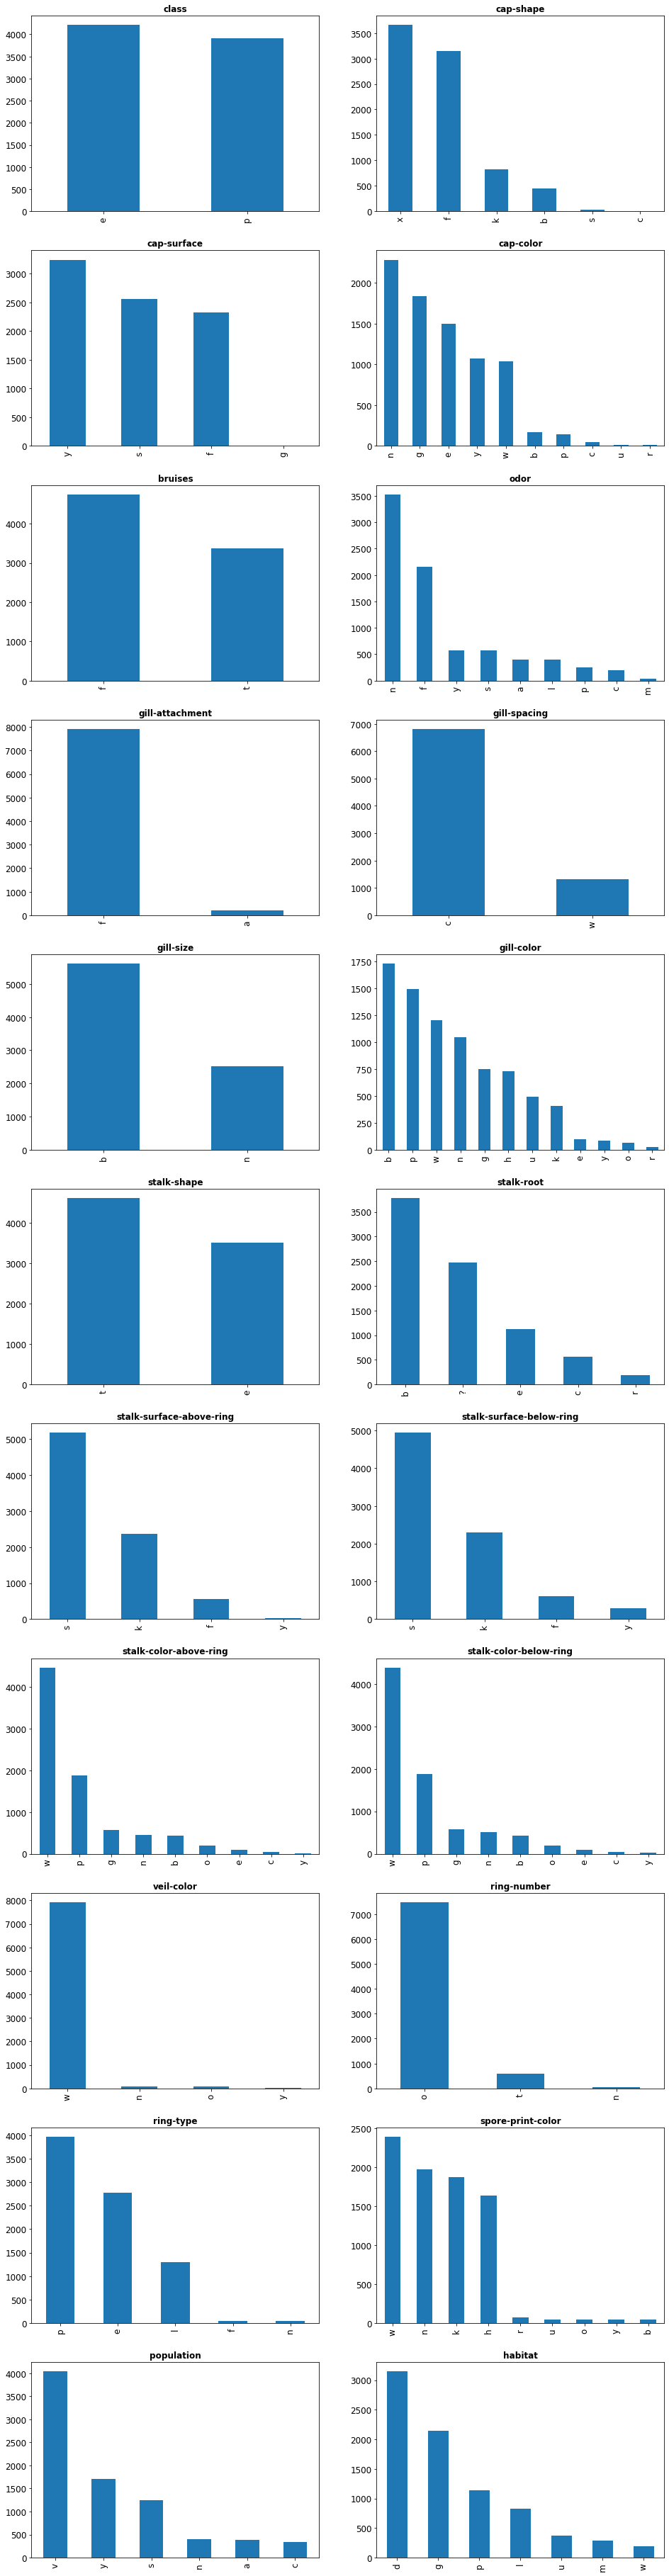

In [15]:
graficos_eda_categoricos(df.select_dtypes('O'))

Nuestro target es 'class' y tiene 2 posibles valores ('e' - no venenosa y 'p' - venenosa)  
Las muestras de cada clase estan distribuidas casi por igual (dataset balanceado).  
Cambiamos los valores a 0 y 1 para el correcto funcionameinto del modelo.

In [108]:
# Transformamos 'class' a numérica:
df['class'] = df['class'].map({'e':0, 'p':1})

Cambiamos el nombre de la volumna 'class' para que no produja el conflicto en python


In [109]:
df = df.rename(columns={'class':'Class'})

In [110]:
df.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


Miramos el impacto de cada variable en nuestro target

In [111]:
def graficos_impacto_target(columnas):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(columnas.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(columnas):
        temp = df.groupby(variable).Class.mean()*100
        temp.plot.bar(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

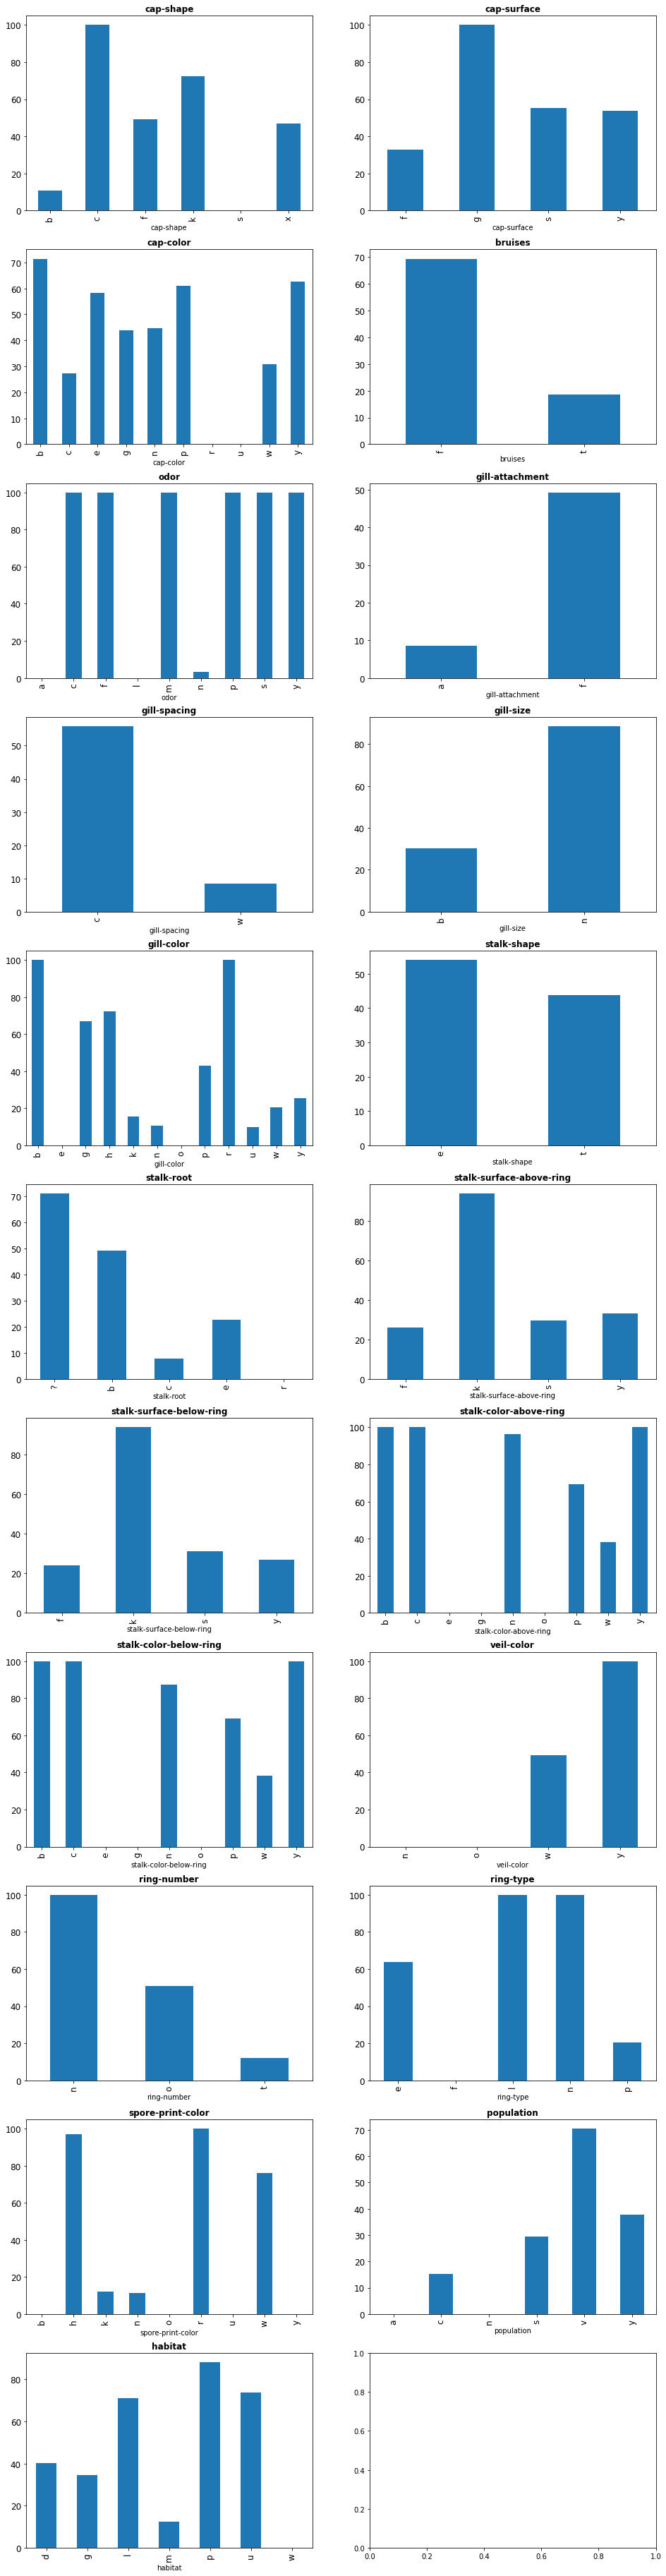

In [112]:
graficos_impacto_target(df.iloc[:,1:])

In [113]:
# Visualizamos el número de observaciones de cada clase
df['Class'].value_counts(normalize=True)


0    0.517971
1    0.482029
Name: Class, dtype: float64

# 3. Manipulación de los datos

Los datos son categóricos, por lo que tendremos que convertirlos en ordinales. 
Para esto hay que cambiar el tipo de dato de "object" a "category" y aplicar LabelEncoder a los datos para obtener valores numéricos en las columnas categóricas. 

In [114]:
for col in df.iloc[:,1:]: #convertimos el tipo de datos de cada columna (menos el target) a category
  df[col] = df[col].astype('category')
df.dtypes

Class                          int64
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [115]:
# cambia los datos a catetórico si lo necesita
df_category = df

In [116]:
# aplicamos label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in df_category.iloc[:,1:]:
  le.fit(df_category[col])
  LabelEncoder()
  df_category[col]=le.transform(df_category[col])



In [117]:
df_category.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


# 4. Vista rápida de las características de los datos

Representamos las correlaciones entre las variables en una matriz de correlación.

In [119]:
# puedes usar corr()
df_category.corr().style.background_gradient(cmap="coolwarm").set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Class,1.00,0.05,0.18,-0.03,-0.50,-0.09,0.13,-0.35,0.54,-0.53,-0.10,-0.38,-0.33,-0.30,-0.15,-0.15,0.15,-0.21,-0.41,0.17,0.30,0.22
cap-shape,0.05,1.00,-0.05,-0.05,-0.04,-0.02,0.08,0.01,0.05,-0.01,0.06,0.03,-0.03,-0.03,-0.03,-0.03,0.07,-0.11,-0.03,-0.07,0.06,-0.04
cap-surface,0.18,-0.05,1.00,-0.02,0.07,0.05,-0.03,-0.28,0.21,-0.16,-0.01,-0.13,0.09,0.11,0.07,0.07,-0.02,-0.03,-0.11,0.23,0.02,0.16
cap-color,-0.03,-0.05,-0.02,1.00,-0.00,-0.39,0.04,0.14,-0.17,0.08,-0.46,0.32,-0.06,-0.05,0.00,0.01,0.04,-0.01,0.16,-0.29,-0.14,0.03
bruises,-0.50,-0.04,0.07,-0.00,1.00,-0.06,0.14,-0.30,-0.37,0.53,0.10,0.24,0.46,0.46,0.08,0.09,0.12,0.06,0.69,-0.29,0.09,-0.08
odor,-0.09,-0.02,0.05,-0.39,-0.06,1.00,-0.06,0.06,0.31,-0.13,0.46,-0.21,0.12,0.06,0.17,0.17,-0.06,0.11,-0.28,0.47,-0.04,-0.03
gill-attachment,0.13,0.08,-0.03,0.04,0.14,-0.06,1.00,0.07,0.11,-0.13,0.19,0.14,-0.09,-0.12,0.10,0.10,0.90,0.09,-0.15,-0.03,0.17,-0.03
gill-spacing,-0.35,0.01,-0.28,0.14,-0.30,0.06,0.07,1.00,-0.11,0.10,0.08,0.35,-0.21,-0.21,0.27,0.25,0.07,0.24,-0.20,0.05,-0.53,-0.15
gill-size,0.54,0.05,0.21,-0.17,-0.37,0.31,0.11,-0.11,1.00,-0.52,0.21,-0.34,0.06,0.01,0.30,0.28,0.10,-0.17,-0.46,0.62,0.15,0.16
gill-color,-0.53,-0.01,-0.16,0.08,0.53,-0.13,-0.13,0.10,-0.52,1.00,-0.18,0.32,0.22,0.26,-0.06,-0.07,-0.10,0.10,0.63,-0.42,-0.03,-0.20


Normalmente, la variable menos correlacionada con las otras, es la más importante para la clasificación. 

En nuestro caso es la variable cap-shape



In [120]:
df_corr = df_category[['Class','cap-shape']]
df_corr.head()

,Class,cap-shape
0,1,5
1,0,5
2,0,0
3,1,5
4,0,5


In [121]:
df_last_corr = df_corr.groupby('cap-shape').mean().sort_values(by='Class', ascending = False)

In [122]:
df_last_corr

,Class
cap-shape,
1,1.000000
3,0.724638
2,0.493655
5,0.467177
0,0.106195
4,0.000000


# 5. Preparamos los datos

Dividimos los datos en X para las características e y para las clases.
Obtenemos también los datos de entrenamiento y test en X_train, X_test, y_train, y_test.

Utilizamos el 80 % de los datos para el entrenamiento y el 20 % para el test.

In [123]:
X = df_category.drop('Class',axis=1)
y = df_category['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=df_category['Class'], test_size=0.2)

# 6. ML - Clasificación

Entrenamos el algoritmod de clasificación de **Decision Tree**, optimizamos sus hiperparámetros para obtener el mejor rendimiento del modelo utilizando **GridSearchCV**.


1. Representa su matriz de confusión
2. Su reporte de clasificación

In [124]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [125]:

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' :range(1,20),
          }
cv = 3
verbose = 1
# dt con random state 42
grid = GridSearchCV(
        estimator  = DecisionTreeClassifier(random_state = 42),
        param_grid = params,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = 3,
        verbose    = 1,
        return_train_score = True,
      
       )

grid.fit(X = X_train, y = y_train)

# obten los mejores parametros





Fitting 3 folds for each of 38 candidates, totalling 114 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [126]:
print(grid.best_params_)

print(grid.best_score_)


{'criterion': 'gini', 'max_depth': 7}
0.9995385325334564


Reentrenamos nuestro modelo con los hiperparametros obtenidos.

In [128]:
dec_tree_optim = DecisionTreeClassifier(
                 criterion='gini',
                 max_depth=7,
                 random_state=42
)

In [129]:
dec_tree_optim.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [131]:
y_predict_test = dec_tree_optim.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [132]:
print('Accuracy: ', accuracy_score(y_test, y_predict_test)) #sacamos las metricas del modelo optimizado
print('ROC: ',roc_auc_score(y_test,y_predict_test))
print('F1: ', f1_score(y_test,y_predict_test))

Accuracy:  1.0
ROC:  1.0
F1:  1.0


In [69]:
# calculamos el score para la predicción en test


In [134]:
# obtén el classificasion report de X_test
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict_test, target_names=['0','1']))

print(confusion_matrix(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[842   0]
 [  0 783]]


In [135]:
# representamos la matriz de confusion
from sklearn.metrics import ConfusionMatrixDisplay

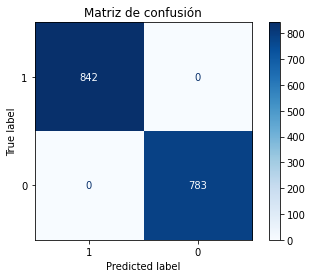

In [136]:
disp = ConfusionMatrixDisplay.from_estimator(
        dec_tree_optim,
        X_test,
        y_test,
        display_labels=y.unique(),
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('Matriz de confusión')

# print(title)
# print(disp.confusion_matrix)

plt.show()

Representamos el arbol de decision con export_graphiz.


In [137]:
dt = DecisionTreeClassifier(
                 criterion='gini',
                 max_depth=7,
                 random_state=42
)
dt.fit(X_train,y_train)
export_graphviz( 
 dt,
 out_file=('setas_tree.dot'),
 feature_names=None,
 class_names=None,
 filled=True,
)

In [138]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(dt,
                           feature_names=X.columns,
                           rounded=True,
                           filled=True)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [139]:
from IPython.display import Image

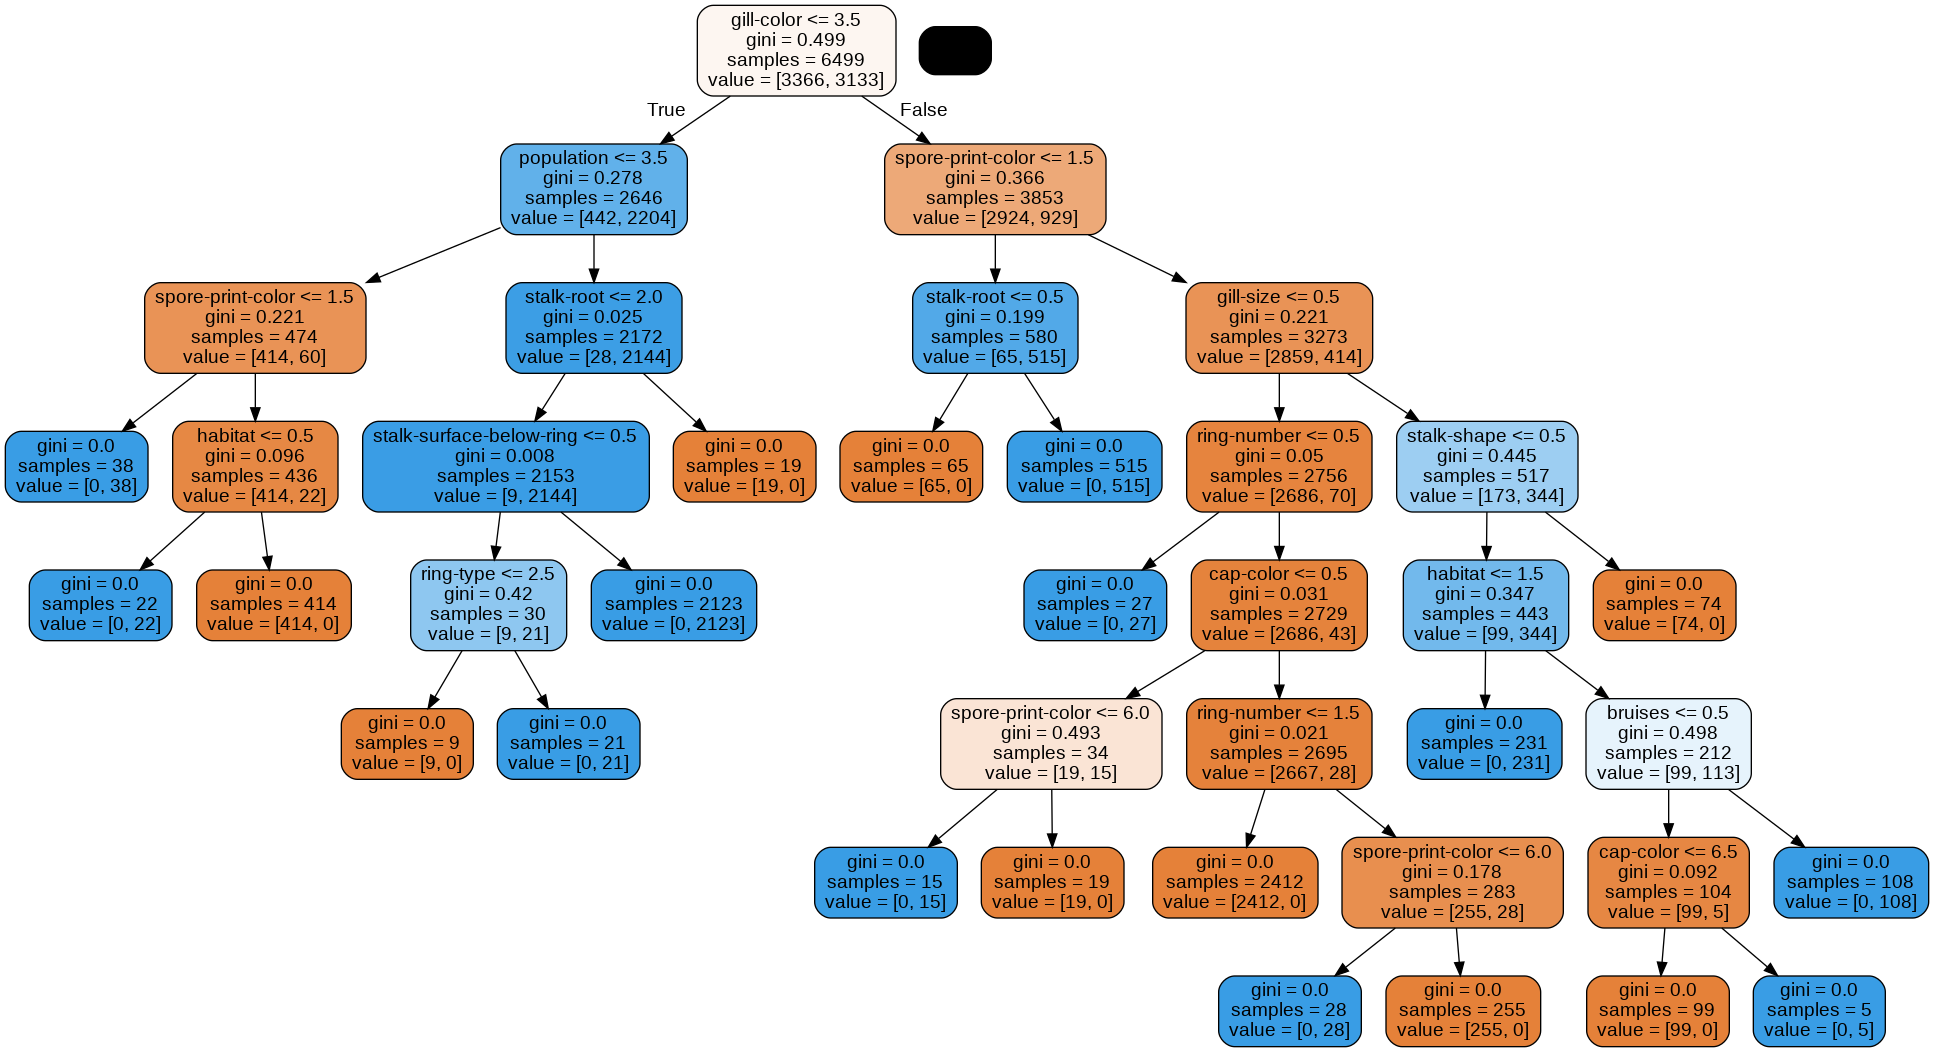

In [140]:
Image('/content/tree.png')

Tambien se puede representar el arbol de decisiones con sklearn

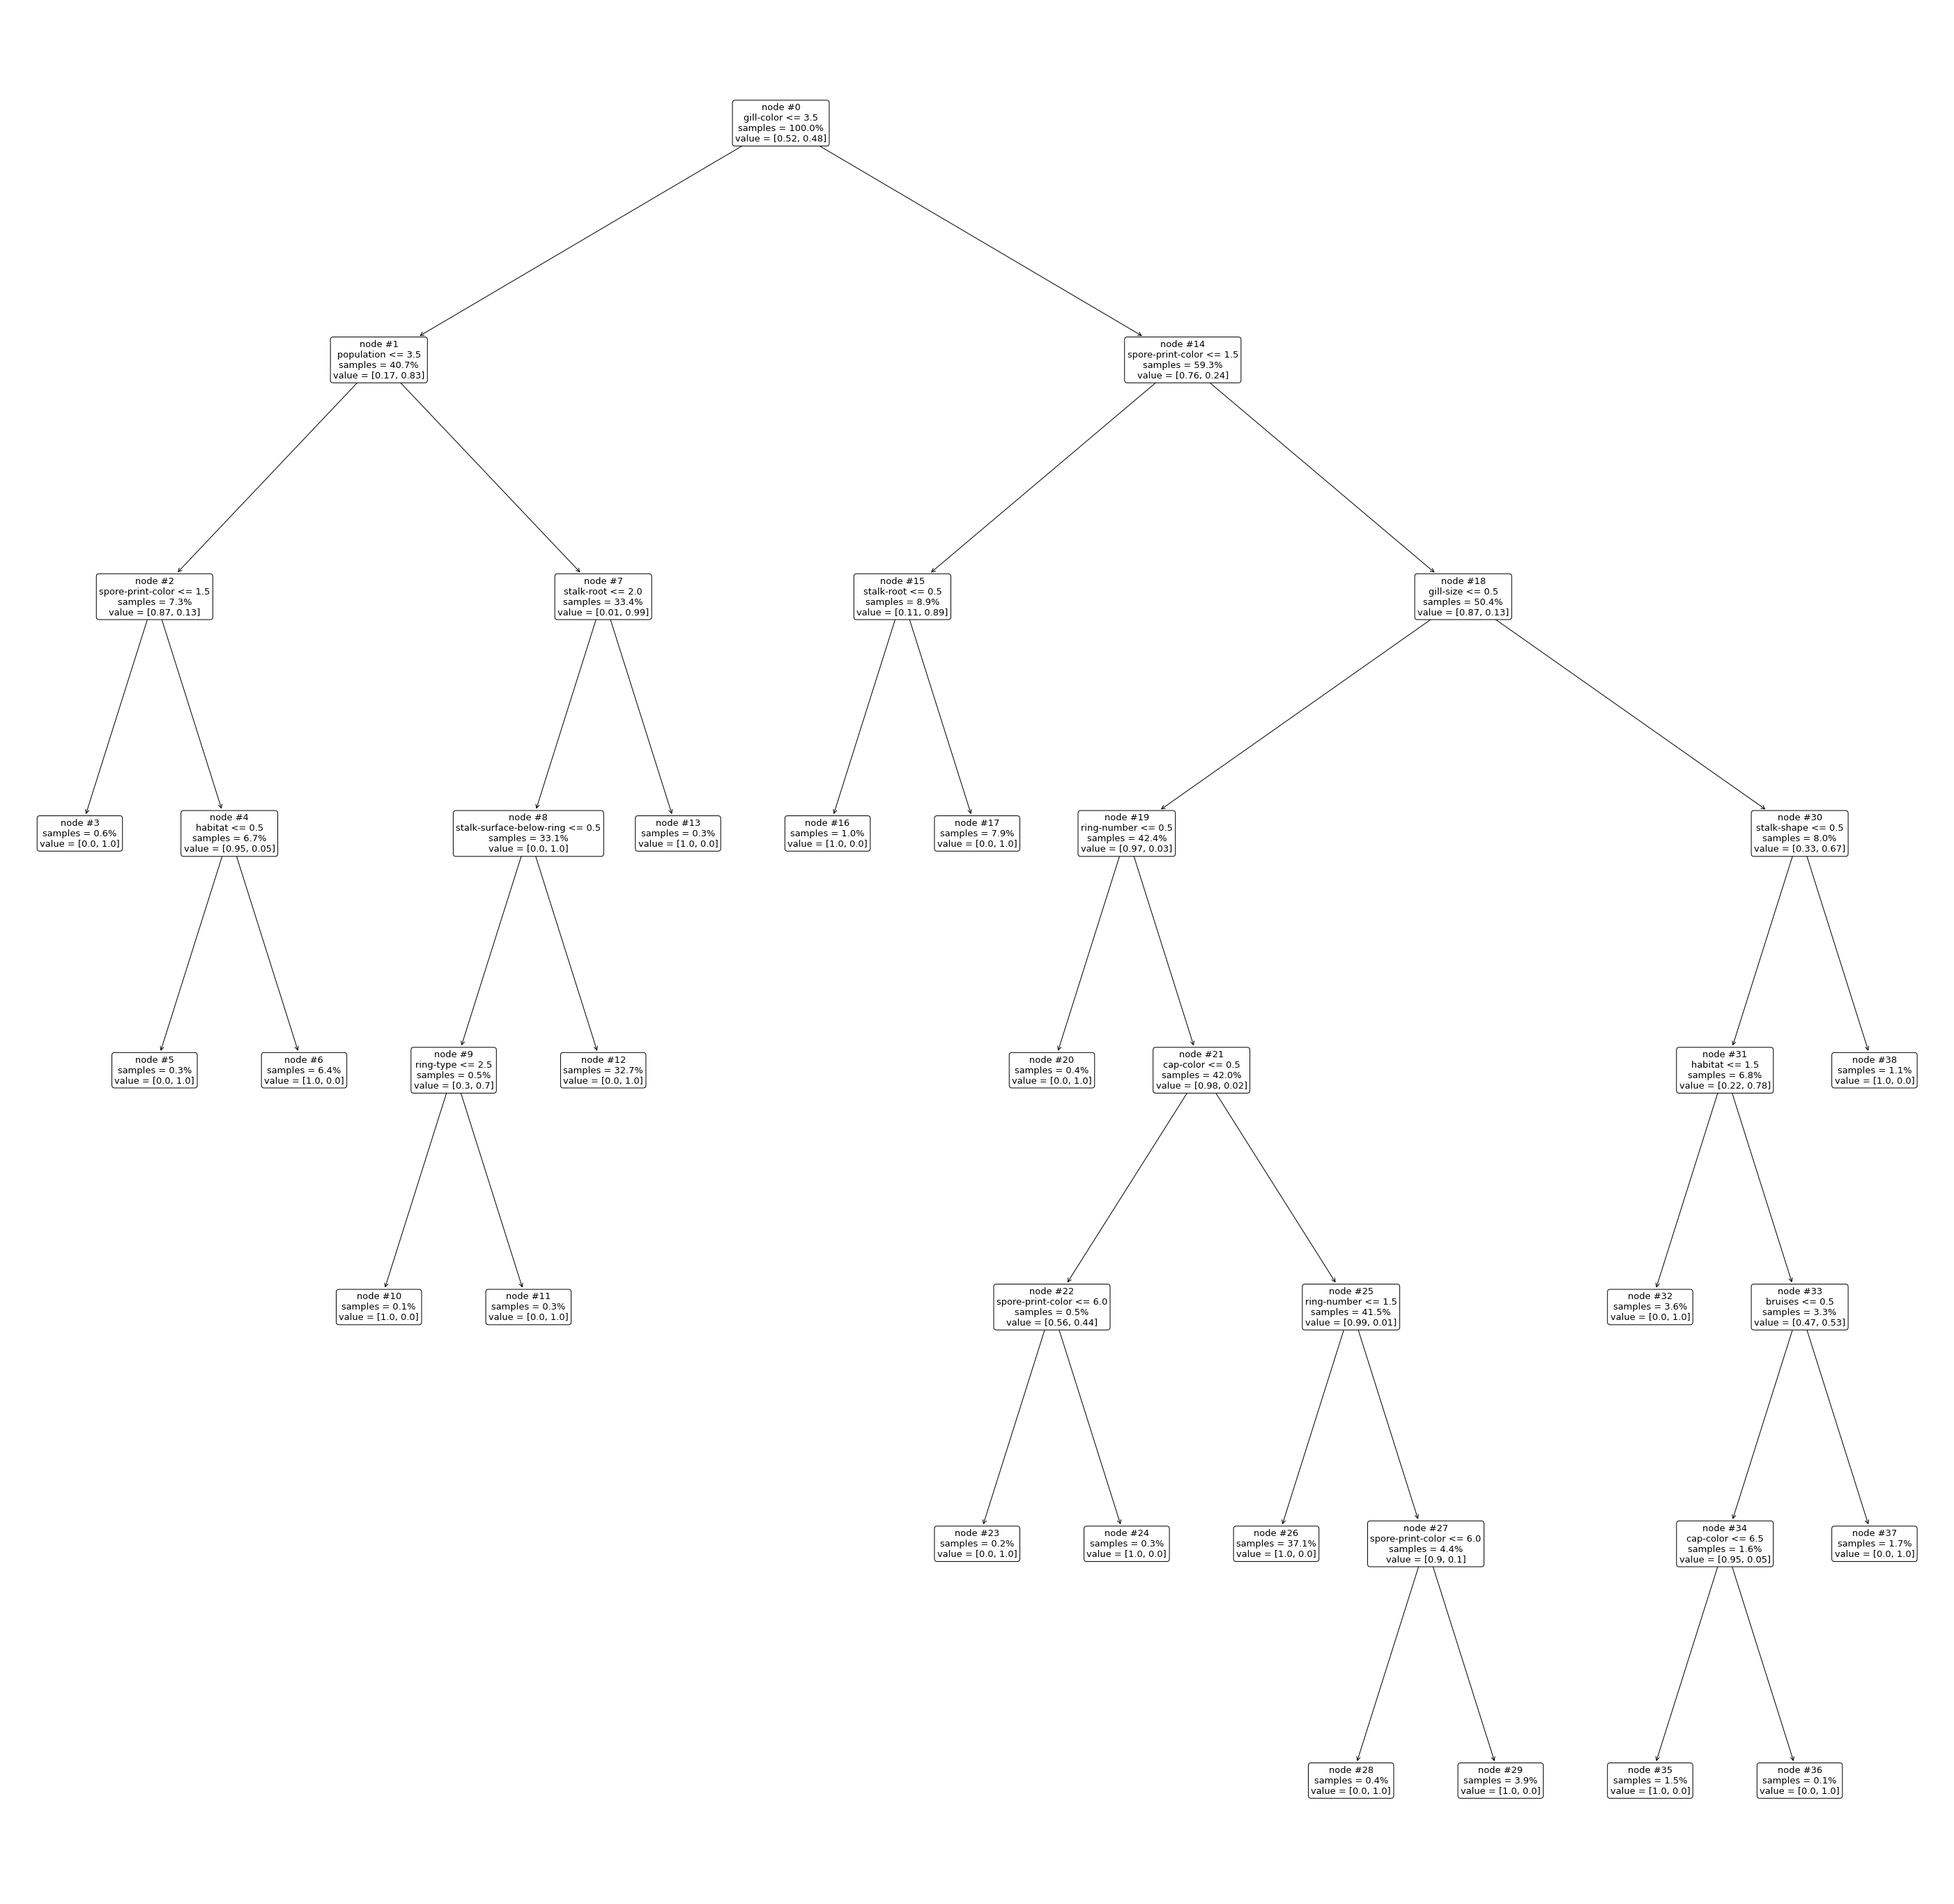

In [141]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(dt,
          feature_names= X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

# PCA


**Principal Component Analysis** es una técnica de Extracción de Características donde combinamos las entradas de una manera específica y podemos eliminar algunas de las variables “menos importantes” manteniendo la parte más importante todas las variables. Como valor añadido, luego de aplicar PCA conseguiremos que todas las nuevas variables sean independientes una de otra.

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 

In [79]:
#normalizamos los datos
scaler=StandardScaler()
df_X = df_category.drop(['Class'], axis=1) # quito la variable dependiente y
scaler.fit(df_X) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df_X)# Ahora si, escalo los datos y los normalizo

In [80]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=15) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [142]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma varianza:',sum(expl[0:15]))


shape of X_pca (8124, 15)
[0.18445868 0.1239559  0.1143068  0.10316574 0.08108677 0.06641829
 0.04660396 0.04532475 0.03666389 0.03388861 0.02749931 0.02582943
 0.02426517 0.02272168 0.01830571]
suma varianza: 0.9544946793350954


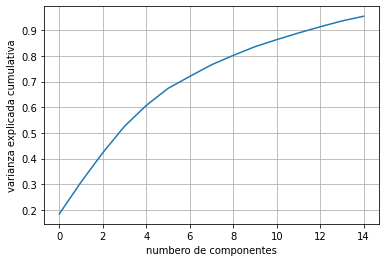

In [143]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numbero de componentes')
plt.ylabel('varianza explicada cumulativa')
plt.grid()
plt.show()

In [144]:
df_pca = pd.DataFrame(X_pca)


In [145]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598,0.821627,0.080134,0.611855,-0.519966
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346,-1.387830,-0.185504,-0.916553,-0.113078
2,-1.858036,-0.270972,-1.372371,1.055963,-1.810316,-0.874188,-1.768193,-0.286344,0.674741,0.339317,-0.293566,-0.511113,-0.033061,-0.519470,0.016525
3,-0.884780,-0.756468,-1.342068,0.370162,-2.111239,-2.110207,1.089952,1.243782,0.709039,0.478215,-1.285118,1.213600,0.434106,0.025716,-0.059661
4,0.689613,1.239262,-3.113237,0.814721,1.541685,-0.555917,0.585614,1.598763,-0.851453,1.436707,-0.015359,-1.260035,-0.682285,0.517256,-0.514080


In [146]:
y_pca = df_category[['Class']]

In [147]:
df_pca = pd.concat([df_pca, y_pca], axis=1)

In [148]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Class
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598,0.821627,0.080134,0.611855,-0.519966,1
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346,-1.387830,-0.185504,-0.916553,-0.113078,0
2,-1.858036,-0.270972,-1.372371,1.055963,-1.810316,-0.874188,-1.768193,-0.286344,0.674741,0.339317,-0.293566,-0.511113,-0.033061,-0.519470,0.016525,0
3,-0.884780,-0.756468,-1.342068,0.370162,-2.111239,-2.110207,1.089952,1.243782,0.709039,0.478215,-1.285118,1.213600,0.434106,0.025716,-0.059661,1
4,0.689613,1.239262,-3.113237,0.814721,1.541685,-0.555917,0.585614,1.598763,-0.851453,1.436707,-0.015359,-1.260035,-0.682285,0.517256,-0.514080,0


In [150]:
X_pca = df_pca.drop('Class',axis=1)
y_pca = df_pca['Class']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, random_state=42, stratify=df_category['Class'], test_size=0.2)

Aqui voy a probar entrenar el algoritmo con las metricas optimizadas anteriormente utilizando nuevo dataset de componentes principales para comparar resultados.

In [151]:
dec_tree_pca = DecisionTreeClassifier(
                 criterion='gini',
                 max_depth=7,
                 random_state=42
)

In [152]:
dec_tree_pca.fit(X_train_pca,y_train_pca)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [153]:
y_predict_pca = dec_tree_pca.predict(X_test_pca)

In [154]:
print('Accuracy: ', accuracy_score(y_test_pca, y_predict_pca)) #sacamos las metricas del modelo optimizado
print('ROC: ',roc_auc_score(y_test_pca,y_predict_pca))
print('F1: ', f1_score(y_test_pca,y_predict_pca))

Accuracy:  0.9710769230769231
ROC:  0.9706584092487934
F1:  0.9696578437701743


Como vemos hemos obtenido 0.97 de rendimiento.

In [155]:
# classificasion report de X_test
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_pca, y_predict_pca, target_names=['0','1']))

print(confusion_matrix(y_test_pca, y_predict_pca))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       842
           1       0.98      0.96      0.97       783

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

[[827  15]
 [ 32 751]]


In [156]:
# representa matriz de confusion
from sklearn.metrics import ConfusionMatrixDisplay

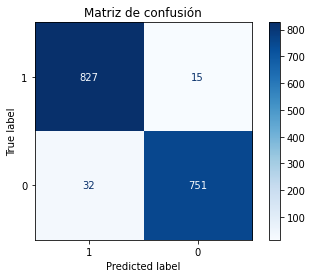

In [157]:
disp = ConfusionMatrixDisplay.from_estimator(
        dec_tree_pca,
        X_test_pca,
        y_test_pca,
        display_labels=y.unique(),
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('Matriz de confusión')

# print(title)
# print(disp.confusion_matrix)

plt.show()

**Pero debemos optimizar de nuevo nuetro modelo**

In [158]:

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' :range(1,20),
          }
cv = 3
verbose = 1

grid = GridSearchCV(
        estimator  = DecisionTreeClassifier(random_state = 42),
        param_grid = params,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = 3,
        verbose    = 1,
        return_train_score = True,
      
       )

grid.fit(X = X_train_pca, y = y_train_pca)

# obten los mejores parametros





Fitting 3 folds for each of 38 candidates, totalling 114 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [159]:
print(grid.best_params_)

print(grid.best_score_)


{'criterion': 'gini', 'max_depth': 13}
0.9924606385579149


In [161]:
dec_tree_pca = DecisionTreeClassifier(
                 criterion='gini',
                 max_depth=13,
                 random_state=42
)

In [162]:
dec_tree_pca.fit(X_train_pca,y_train_pca)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [163]:
y_predict_pca = dec_tree_pca.predict(X_test_pca)

In [164]:
print('Accuracy: ', accuracy_score(y_test_pca, y_predict_pca)) #sacamos las metricas del modelo optimizado
print('ROC: ',roc_auc_score(y_test_pca,y_predict_pca))
print('F1: ', f1_score(y_test_pca,y_predict_pca))

Accuracy:  0.9956923076923077
ROC:  0.9955747581474503
F1:  0.9955156950672646


In [165]:
# classificasion report de X_test
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_pca, y_predict_pca, target_names=['0','1']))

print(confusion_matrix(y_test_pca, y_predict_pca))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       842
           1       1.00      0.99      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[841   1]
 [  6 777]]


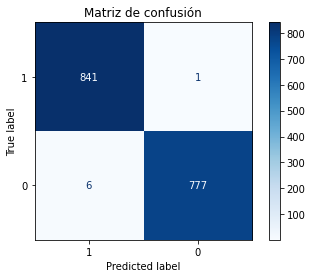

In [166]:
disp = ConfusionMatrixDisplay.from_estimator(
        dec_tree_pca,
        X_test_pca,
        y_test_pca,
        display_labels=y.unique(),
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('Matriz de confusión')

# print(title)
# print(disp.confusion_matrix)

plt.show()

De esta manera he conseguido reducir los mediante el PCA los variables de 22 a 15 sin perder el rendimiento del modelo.